# Exercise 3. Basic Introduction to Probability

## Part 1. Basic Probability Concepts
---
### Task 1. Generate a Synthetic Dataset Representing Rain/No Rain Days Over a Year

1. Create a dataset with 365 entries, each representing a day of the year.
2. Assign a binary value for each day: 1 for a rainy day, and 0 for a non-rainy day.
3. Assume that the probability of a rainy day is 30%.

In [6]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 365 days of rain/no rain data with a 30% probability of rain
days = 365
rain_data = np.random.choice([0, 1], size=days, p=[0.7, 0.3])

# Create a DataFrame with a proper datetime index
df = pd.DataFrame({
    'Day': pd.date_range(start='2023-01-01', periods=days, freq='D'),
    'Rain': rain_data
})

# Display the first few rows
df.head()


,Day,Rain
0,2023-01-01,0
1,2023-01-02,1
2,2023-01-03,1
3,2023-01-04,0
4,2023-01-05,0


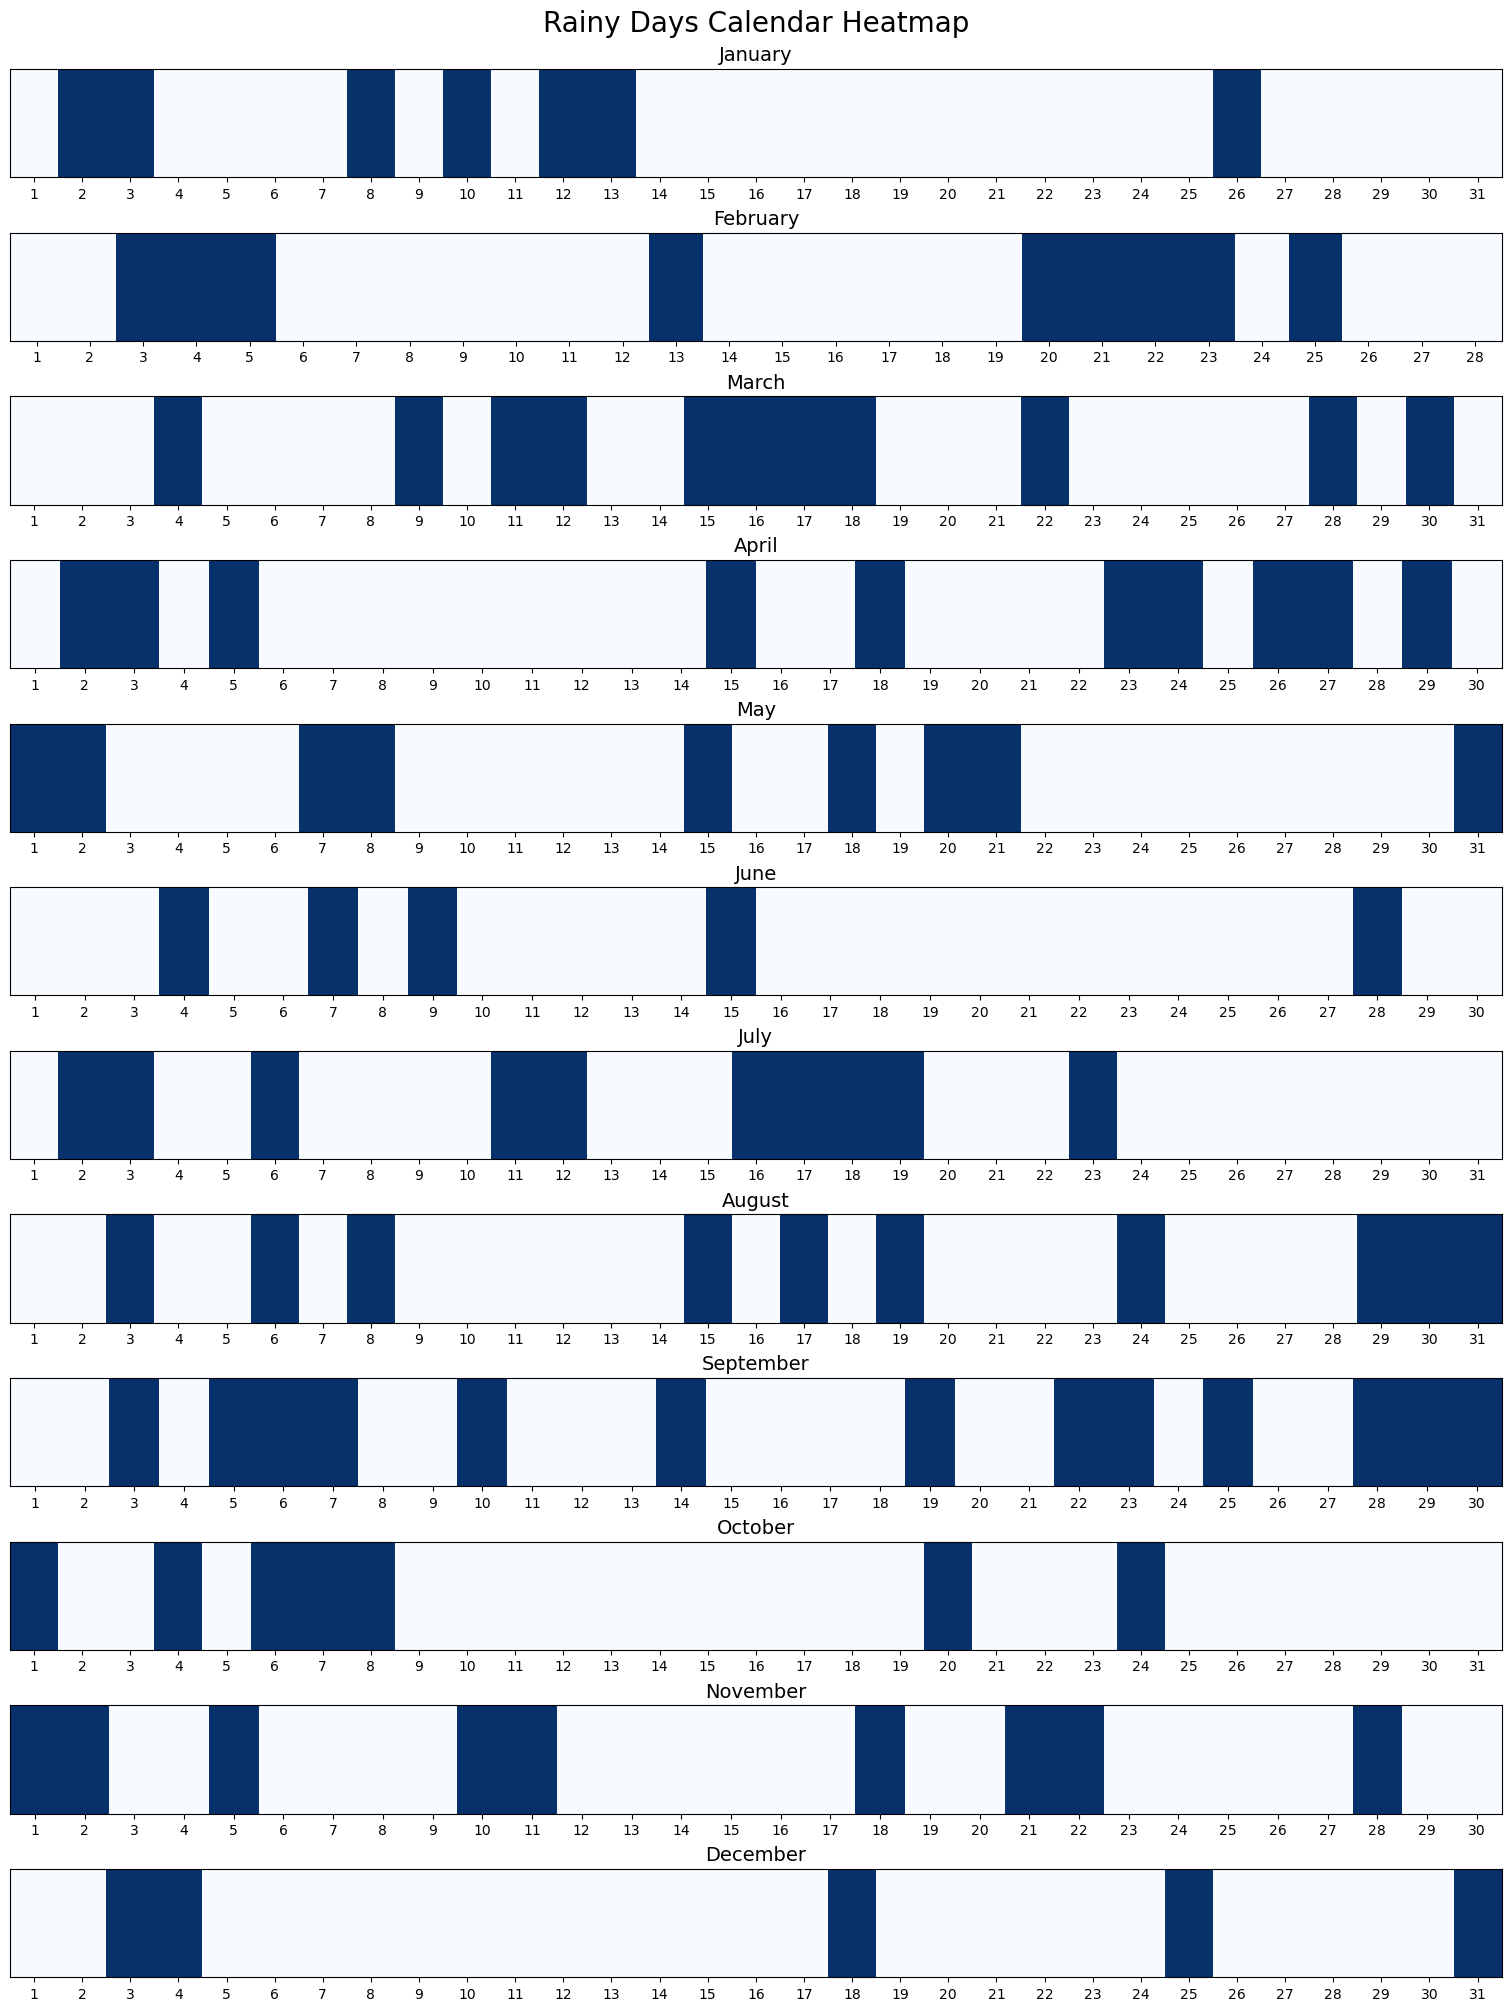

In [7]:
import matplotlib.pyplot as plt
import calendar

# Create a function to plot the calendar grid
def plot_calendar_heatmap(df):
    fig, ax = plt.subplots(12, 1, figsize=(15, 20), constrained_layout=True)

    # Iterate over each month
    for month in range(1, 13):
        # Filter data for the current month
        month_data = df[df['Day'].dt.month == month]

        # Create a grid for the calendar
        month_days = month_data['Day'].dt.day
        rain = month_data['Rain'].values

        # Create a new subplot for the month
        ax[month - 1].set_title(calendar.month_name[month], fontsize=14)
        ax[month - 1].imshow(rain.reshape(1, -1), aspect='auto', cmap='Blues', vmin=0, vmax=1)

        # Set ticks and labels
        ax[month - 1].set_xticks(np.arange(len(month_days)))
        ax[month - 1].set_xticklabels(month_days, fontsize=10)
        ax[month - 1].set_yticks([])  # Hide y-axis

    plt.suptitle("Rainy Days Calendar Heatmap", fontsize=20)
    plt.show()

# Plot the calendar heatmap
plot_calendar_heatmap(df)


#### Questions
1. How many rainy days are there in the dataset? Is it close to the expected 30% of the 365 days? Clue ```df.Rain.sum()```
2. In this synthetic dataset, does the distribution of rainy and non-rainy days look random or do you notice any patterns?

Answer to Task 1:
1. There are 105 rainy days in the dataset. And YES, it is closed with expected 30% of the 365 days, since the computed proportion
of rainy days and mean of rain days is 0.29 or 29%. Also, since the 30% of 365days is 109.5days expected rainy days, it is close
to 105 days in the dataset given.
2. The dataset is sythetic and the distribution of rainy and non-rainy days were random. This si because we set the parameter of distribution
and probability of rainy and non-rainy days.

---
### Task 2: Calculate the Frequency, Proportion, and Mean of Rain Days
1. Calculate the total number of rainy days and the proportion of rainy days in the dataset.
2. Calculate the mean, which in this binary case, represents the proportion of rainy days.

Scripts for calculating basic statistics using Pandas can be found here: [Basic statistics on pandas DataFrame](https://github.com/kasiarachuta/Blog/blob/master/Basic%20statistics%20on%20pandas%20DataFrame.ipynb).

You can try the following
- `df.Rain.sum()`
- `df.Rain.count()`
- `df.Rain.mean()`

In [8]:
df['Rain'].sum()

np.int64(105)

In [9]:
df['Rain'].count()

np.int64(365)

In [10]:
df['Rain'].mean()

np.float64(0.2876712328767123)

In [11]:
# Calculate total rainy days
total_rainy_days = 105

# Calculate the proportion of rainy days
proportion_rainy_days = total_rainy_days/365# Clue total_rainy/total_days

# Calculate the mean of the rain column
mean_rain_days = 0.29 # Clue just take the mean

print(f"Total Rainy Days: {total_rainy_days}")
print(f"Proportion of Rainy Days: {proportion_rainy_days:.2f}")
print(f"Mean of Rain Days: {mean_rain_days:.2f}")


Total Rainy Days: 105
Proportion of Rainy Days: 0.29
Mean of Rain Days: 0.29


#### Questions
1. Does the mean match the proportion of rainy days? Why is this the case for binary data (i.e. data with zeros and ones)?
2. If you were to repeat the simulation by running the first cells again, would the number of rainy days always be exactly 30%? Why or why not? What if you changed the value in `np.random.seed(42)`?

Answer to Task 2:
1. Yes, the mean of rainy days and proportion of rainy days were of the same value. This is because, the dataset just provided of
   either there was a rain or non, and not the actual value of rain in a day. As such, the actual amount of rainin a day was
   neglected, disallowing the program to compute for the amount of rain in a days, insted, it just compute the proportion of rainy
   days and giving the same value with that of mean rain days. And it is computed as 105(rainy days):365(total days), which gives us ~0.29.
2. Not exactly 30%, but close to 30% (~29%) and still give you the same number of rainy days which is 105 for np.random.seed(42). This may be because
   certain random seed number corresponds with a certain value for rainy days, because when I tried to re-run the code, trying to change the random
   seed number for several values, it corresponds with different number of rainy days, (ie, rs(84) gives 90, rs(63) gives 100, rs(10)104)
   rs(21) gives 120), and repeating it will still give the same value in every random seed.

---
### Task 3: Add a Second Variable (Wind Speed) to the Dataset
1. We will add a second variable representing wind speed for each day.
2. Assume the wind speed can be categorized as high (1) or low (0), with a 40% chance of high wind speed on any given day.

In [12]:
# Generate high/low wind speed data with a 40% probability of high wind speed
wind_data = np.random.choice([0, 1], size=days, p=[0.6, 0.4])

# Add wind data to the DataFrame
df['Wind'] = wind_data

# Display the first few rows
df.head()


,Day,Rain,Wind
0,2023-01-01,0,0
1,2023-01-02,1,1
2,2023-01-03,1,1
3,2023-01-04,0,0
4,2023-01-05,0,0


In [13]:
df['Wind'].sum()

np.int64(143)

In [14]:
df['Wind'].count()

np.int64(365)

In [15]:
df['Wind'].mean()

np.float64(0.3917808219178082)

#### Questions
1. What is the overall proportion of days with high wind speed in the dataset? Does it match the expected 40% probability?

Answer to Task 3:
1. The overall proportion of days with high wind speed is ~0.3917 or 39.17%. Does not exactly the same with 40% probability, but close to 40%.
   This results due to rounding off the sub-result in computing the probability.

---
### Task 4: Calculate the Joint and Marginal Probabilities
1. Calculate the joint probability of rain and high wind speed (i.e., both events occurring on the same day).
2. Calculate the marginal probability of each event separately: the probability of rain and the probability of high wind speed.

In [17]:
# Calculate joint probability of rain and high wind speed
joint_probability = len(df[(df['Rain'] == 1) & (df['Wind'] == 1)]) / days

# Calculate probabilities 
probability_rain = 0.29
probability_wind = 0.39

print(f"Joint Probability of Rain and High Wind: {joint_probability:.2f}")
print(f" Probability of Rain: {probability_rain:.2f}")
print(f" Probability of High Wind: {probability_wind:.2f}")


Joint Probability of Rain and High Wind: 0.12
 Probability of Rain: 0.29
 Probability of High Wind: 0.39


#### QUestions
1. What is the joint probability of a rainy day with high wind speed? How does it compare to the individual probabilities of rain and wind speed?
2. Why is the joint probability generally lower than the individual marginal probabilities? What does this tell you about the relationship between rain and high wind?

Answer to Task 4:
1. The joint probability of a rainy day with high wind speed is 0.12. It is lower than the individual probabilities (p for rain, 0.29 and
   p for high wind of 0.39). Meaning the occurence of a rainy day with high wind speed (p=0.12) has a lower chance, compared to inidividual
   event of rain (p=0.29) or high wind (p=0.39).
2. Joint probability is generally lower than individual marginal probabilities because the parameters to meet for the occurence of a both events
   to happen at the same time had been increased, and the number of samples also increased, which results to a lower chance of occurence compared
   to individual event to happen. The joint probability of high wind and rain is the product of individual probabilities
   (p of rain x p of highwind). The higher of probability of occurence of individual events (either rain or high wind, such as one is hold constant)
   the higher their joint probability. 
     

--- 
### Task 5: Visualize the Joint and Marginal Probabilities
1. Create a stacked bar chart that shows the distribution of rainy and non-rainy days, split further by wind speed categories.

C:\Users\alexg\AppData\Local\Temp\ipykernel_5736\2811506166.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='coolwarm')


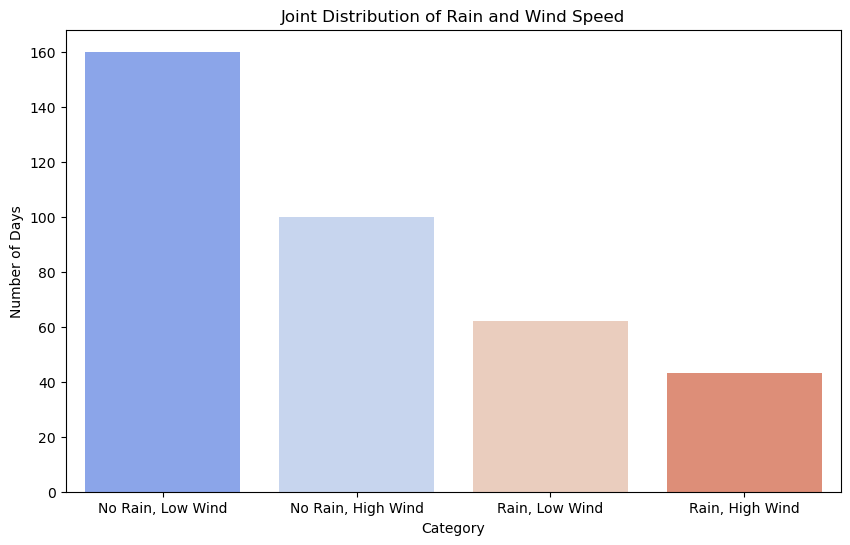

In [32]:
import seaborn as sns

# Create a new column for combined categories
df['Rain_Wind'] = df['Rain'].astype(str) + '_' + df['Wind'].astype(str)

# Count occurrences of each category
counts = df['Rain_Wind'].value_counts().sort_index()

# Prepare data for the bar plot
categories = ['0_0', '0_1', '1_0', '1_1']
labels = ['No Rain, Low Wind', 'No Rain, High Wind', 'Rain, Low Wind', 'Rain, High Wind']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, palette='coolwarm')
plt.title('Joint Distribution of Rain and Wind Speed')
plt.xlabel('Category')
plt.ylabel('Number of Days')
plt.show()


#### Questions
1. Based on the bar chart, which combination of events (rain and wind) is most common? Which is the least common?
2. How does visualizing the joint distribution help in understanding the relationship between these variables? 

In [34]:
print(counts)

Rain_Wind
0_0    160
0_1    100
1_0     62
1_1     43
Name: count, dtype: int64


Answer to Task 5:
1. The most common and most likely to occur based on the plot of the dataset provided is the "No Rain, Low Wind" with 160 counts or
   accounts to p=0.44, while the least likely to occur is the "Rain, High Wind" with 43 counts or accounts to p=0.12.
2. Visualizatios is a big help on understanding and analyzing the occurence of a certain event and the relationship between and among the
   variables, because we can easily grasp the ideas of what is happenning and how does one variable or event affects each other. In this
   data set alone, it tells to us, what are most likely to happen and cosequently, what to do or what to prepare for such event to happen.
   And if I were to analyze the individual event based on the visualization I see, the occurence of "No Rain" seems to appear to be the
   highest in terms of individual event, because, by inspection, it appears to the two most highest combination events. And the occurence of
   "High Wind" seems to be the lowest among the individual event.

---

### Final Questions
1. What’s the difference between counting how many times it rained (frequency) and calculating the probability of rain? How does probability help us summarize what we see in the data?
2. Why do you think it’s helpful to know the proportion of rainy days in a month or year? What does it tell us about the climate in a place?
3. What do we learn when we check for days that are both rainy and windy? How is this different from just looking at rainy days or windy days alone?
4. Why do you think this kind of probability is useful for weather forecasting? Can it help us make better guesses about the weather?
5. If you only knew the temperature and wind speed, how well could you guess if it would rain? What might make this kind of prediction uncertain or incomplete?

Answer to Final Questions:
1. Counting or getting the frequency of occurence of rain is merely getting how many times it rain in a given specific period of time, while
   calculating the probability that it will rain is getting the percent of chance that it will rain in a given specified period of time.
   Probability helps us to determine the percent chance of a certain event will happen,so, in forecasting for example, we can determine the chance
   of it will rain or not, it will be windy or not, it will be sunny or not, if we can compute for their probabiliteies, either individually or
   joint probability. This is also of big aide, during TC events, determining the probability of its track and intensity. And many more...
2. Proportion of rainy days in a month or in a year is very important also, like probability, it tells us the chance how often it will rain in a
   month or in a year in a certain location. So for, farmers, they will know when to plant a certain crops, for a fisherfolk to know, when to go to
   catch a fish, and for us ordinary people to know what chores to do based on the expected weather, based on calculated probability or chance of
   rain. I think, this was one of the basis for climate classification (esp. Phil's Corona's Climate Class), the occurence of rainy days and the
   amount of rain in a month. With the number of rainy days in a month, and the amount of rain in a month for certain years, the location or place
   had been classified whether it belongs to Climate Type I, II, III or IV.
3. In determining for events that are both windy and rainy days, we learned that there were only few days that are both windy and rainy (it only
   accounts for ~29% or 43 days out of 365 days). And that the probability is low. On the other hand, if looking independently on either rainy or
   windy days, there were more frequent events/days that appears to be rainy OR windy day.There were some rainy days that were not windy days and
   vice versa. In looking also, perce, for both rainy day AND windy day, both should be have values of 1, while in either rainy OR windy, we just
   need to look for just one variable.
4. This kind of probability is very useful for weather forecasting in order to have an accurate forecast. Either joint or independent probability,
   this proves to be beneficial because it tends to increase the accuracy of our forecasting. And YES, this can help us to have a better forecast
   about our weather. Especially for our joint probability, for it delineate our forecast into specific event that we wanted to determine.
5. If we only knew the temperature and windspeed, we could still guess if it would rain, if we set the threshold for it, since both influences the
   occurence of rainfall in a certain location. But with some limitations and lower accuracy because wind speed and temperature alone cannot
   accurately forecast or predict rainfall. But I think, if we include Relative Humidity as a predictor for the occurence of rainfall, the
   probability to determine the occurence of rainfall will increase significantly.
   